In [20]:
import os

# Get the directory with the notebooks, including its subdirectories
current_dir = os.getcwd()

# Get the directories with data and results
data_dir = os.path.join(current_dir, "data")
temporary_dir= os.path.join(current_dir, "temporary_data")
results_dir = os.path.join(current_dir, "results")

project_dir = os.path.dirname(current_dir)

pre_experiment_dir = os.path.join(project_dir, "pre-experiment")

print(project_dir, current_dir, results_dir, data_dir, pre_experiment_dir)

/home/xternava/Documents/GitHub/bloat-energy-consumption /home/xternava/Documents/GitHub/bloat-energy-consumption/notebooks /home/xternava/Documents/GitHub/bloat-energy-consumption/notebooks/results /home/xternava/Documents/GitHub/bloat-energy-consumption/notebooks/data /home/xternava/Documents/GitHub/bloat-energy-consumption/pre-experiment


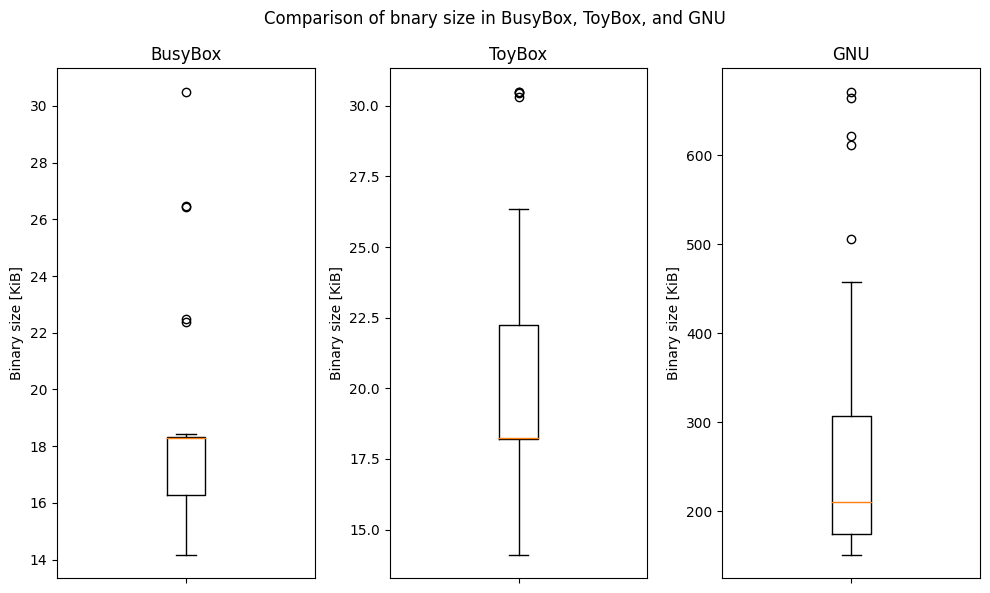

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to convert bytes to kibibytes (KiB)
def bytes_to_kibibytes(bytes_value):
    return bytes_value / 1024

# Function to convert bytes to mebibytes (MiB)
def bytes_to_mebibytes(bytes_value):
    return bytes_value / (1024 * 1024)

# Read the CSV file
bs_file_path = os.path.join(pre_experiment_dir, 'programs.csv')
bs_data = pd.read_csv(bs_file_path, delimiter=';')

# Select the columns for each program
busybox_data = bs_data['BusyBox'].apply(bytes_to_kibibytes)
toybox_data = bs_data['ToyBox'].apply(bytes_to_kibibytes)
gnu_data = bs_data['GNU'].apply(bytes_to_kibibytes)

# Plot the boxplots
plt.figure(figsize=(10, 6))

# BusyBox boxplot
plt.subplot(1, 3, 1)
plt.boxplot(busybox_data)
plt.title('BusyBox')
plt.ylabel('Binary size [KiB]')
plt.xticks([1], ['']) 

# ToyBox boxplot
plt.subplot(1, 3, 2)
plt.boxplot(toybox_data)
plt.title('ToyBox')
plt.ylabel('Binary size [KiB]')
plt.xticks([1], ['']) 

# GNU boxplot
plt.subplot(1, 3, 3)
plt.boxplot(gnu_data)
plt.title('GNU')
plt.ylabel('Binary size [KiB]')
plt.xticks([1], ['']) 

plt.suptitle('Comparison of bnary size in BusyBox, ToyBox, and GNU')
plt.tight_layout()
plt.show()

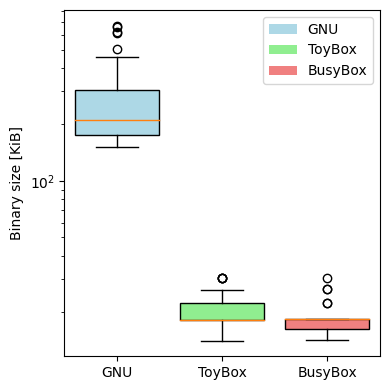

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to convert bytes to kibibytes (KiB)
def bytes_to_kibibytes(bytes_value):
    return bytes_value / 1024

# Function to convert bytes to mebibytes (MiB)
def bytes_to_mebibytes(bytes_value):
    return bytes_value / (1024 * 1024)

# Read the CSV file
bs_file_path = os.path.join(pre_experiment_dir, 'programs.csv')
bs_data = pd.read_csv(bs_file_path, delimiter=';')

# Convert binary sizes to kibibytes
bs_data['GNU'] = bs_data['GNU'].apply(bytes_to_kibibytes)
bs_data['ToyBox'] = bs_data['ToyBox'].apply(bytes_to_kibibytes)
bs_data['BusyBox'] = bs_data['BusyBox'].apply(bytes_to_kibibytes)

# Combine the datasets into a list for boxplot
data_to_plot = [bs_data['GNU'], bs_data['ToyBox'], bs_data['BusyBox']]
labels = ['GNU', 'ToyBox', 'BusyBox']

# Custom colors for the boxplots
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Plot the boxplots with logarithmic y-axis
plt.figure(figsize=(4, 4))  # Adjust the figure size

# Set the widths of the boxes to make them less spread out
box_widths = 0.8

boxes = plt.boxplot(data_to_plot, labels=labels, patch_artist=True, widths=box_widths)

# Set individual box colors using a loop
for box, color in zip(boxes['boxes'], colors):
    box.set(facecolor=color)

plt.ylabel('Binary size [KiB]')
plt.yscale('log')

# Set the desired number of y-axis tick values
#num_ticks = 20 # Choose the number of tick values you want to display
#plt.locator_params(axis='y', numticks=num_ticks)

plt.tight_layout()

# Add legend for colors
legend_patches = [plt.Rectangle((0, 0), 1, 1, fc=color) for color in colors]
plt.legend(legend_patches, labels, loc='upper right')

# Reduce space between the boxplots and align them
plt.subplots_adjust(wspace=0.3)

plt.show()


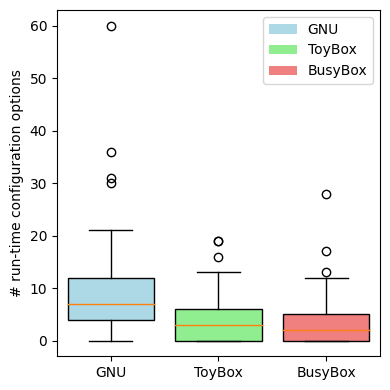

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to convert bytes to kibibytes (KiB)
def bytes_to_kibibytes(bytes_value):
    return bytes_value / 1024

# Function to convert bytes to mebibytes (MiB)
def bytes_to_mebibytes(bytes_value):
    return bytes_value / (1024 * 1024)

# Read the CSV file
bs_file_path = os.path.join(pre_experiment_dir, 'programs_nr_options.csv')
bs_data = pd.read_csv(bs_file_path, delimiter=';')

# Convert binary sizes to kibibytes
bs_data['GNU'] = bs_data['GNU']
bs_data['ToyBox'] = bs_data['ToyBox']
bs_data['BusyBox'] = bs_data['BusyBox']

# Combine the datasets into a list for boxplot
data_to_plot = [bs_data['GNU'], bs_data['ToyBox'], bs_data['BusyBox']]
labels = ['GNU', 'ToyBox', 'BusyBox']

# Custom colors for the boxplots
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Plot the boxplots with logarithmic y-axis
plt.figure(figsize=(4, 4))  # Adjust the figure size

# Set the widths of the boxes to make them less spread out
box_widths = 0.8

boxes = plt.boxplot(data_to_plot, labels=labels, patch_artist=True, widths=box_widths)

# Set individual box colors using a loop
for box, color in zip(boxes['boxes'], colors):
    box.set(facecolor=color)

plt.ylabel('# run-time configuration options')
#plt.yscale('log')
#plt.title('Comparison of binary size in BusyBox, ToyBox, and GNU (Logarithmic Scale)')
plt.tight_layout()

# Add legend for colors
legend_patches = [plt.Rectangle((0, 0), 1, 1, fc=color) for color in colors]
plt.legend(legend_patches, labels, loc='upper right')

# Reduce space between the boxplots and align them
plt.subplots_adjust(wspace=0.3)

plt.show()


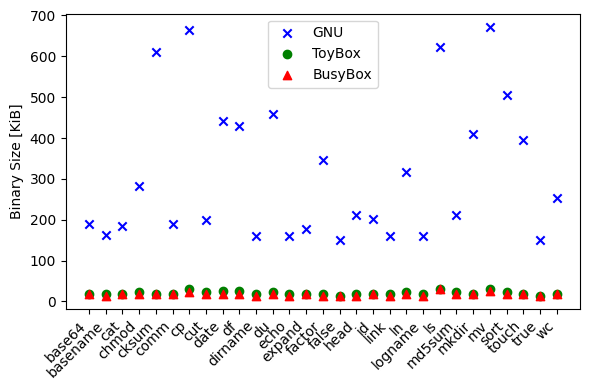

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
bs_file_path = os.path.join(pre_experiment_dir, 'programs30.csv')
data = pd.read_csv(bs_file_path, delimiter=';')

# Extract the relevant columns for plotting
programs = data['Program']
gnu_sizes = data['GNU']
toybox_sizes = data['ToyBox']
busybox_sizes = data['BusyBox']

# Convert binary sizes to Kibibytes (KiB)
gnu_sizes_kib = gnu_sizes / 1024
toybox_sizes_kib = toybox_sizes / 1024
busybox_sizes_kib = busybox_sizes / 1024

# Create the scatter plot
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed

# Plot GNU data points with 'x'
plt.scatter(programs, gnu_sizes_kib, marker='x', color='blue', label='GNU')

# Plot ToyBox data points with 'o'
plt.scatter(programs, toybox_sizes_kib, marker='o', color='green', label='ToyBox')

# Plot BusyBox data points with 'triangle'
plt.scatter(programs, busybox_sizes_kib, marker='^', color='red', label='BusyBox')

# Add labels and legend
#plt.xlabel('Programs')
plt.ylabel('Binary Size [KiB]')
#plt.title('Binary Size Comparison in GNU, ToyBox, and BusyBox')
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping of labels
plt.show()


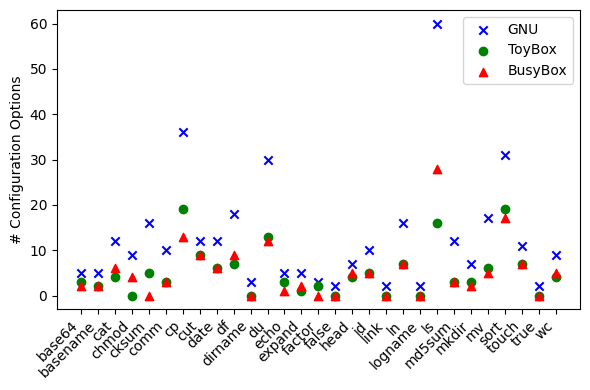

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
bs_file_path = os.path.join(pre_experiment_dir, 'programs_nr_options30.csv')
data = pd.read_csv(bs_file_path, delimiter=';')

# Extract the relevant columns for plotting
programs = data['Program']
gnu_sizes = data['GNU']
toybox_sizes = data['ToyBox']
busybox_sizes = data['BusyBox']

# Create the scatter plot
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed

# Plot GNU data points with 'x'
plt.scatter(programs, gnu_sizes, marker='x', color='blue', label='GNU')

# Plot ToyBox data points with 'o'
plt.scatter(programs, toybox_sizes, marker='o', color='green', label='ToyBox')

# Plot BusyBox data points with 'triangle'
plt.scatter(programs, busybox_sizes, marker='^', color='red', label='BusyBox')

# Add labels and legend
#plt.xlabel('Programs')
plt.ylabel('# Configuration Options')
#plt.title('Binary Size Comparison in GNU, ToyBox, and BusyBox')
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping of labels
plt.show()

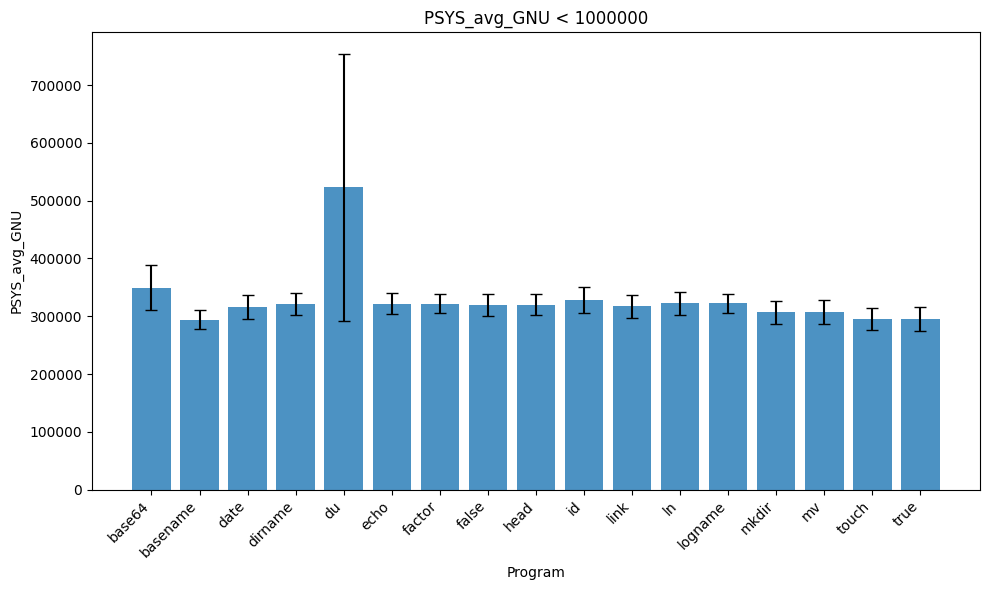

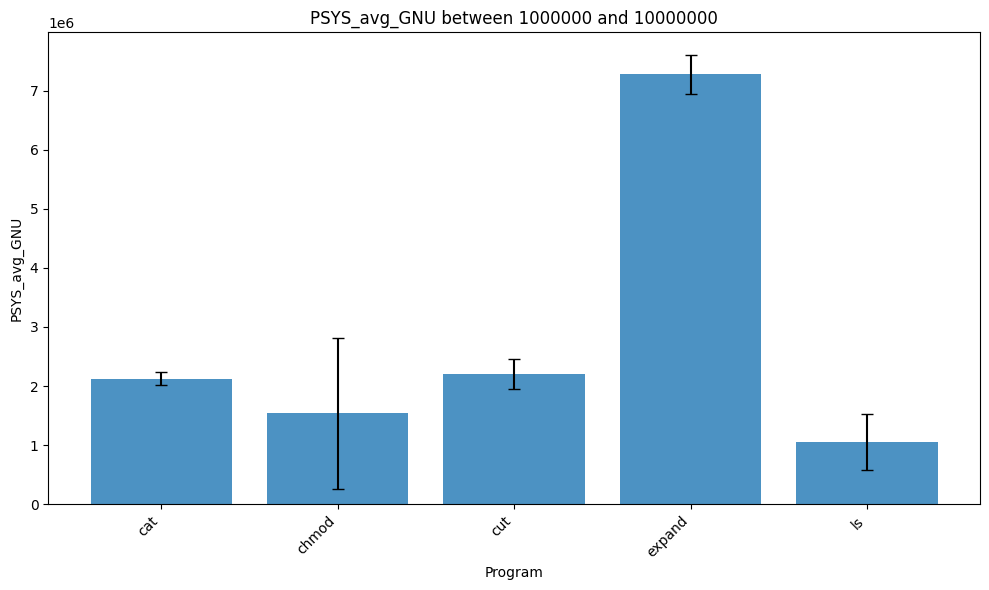

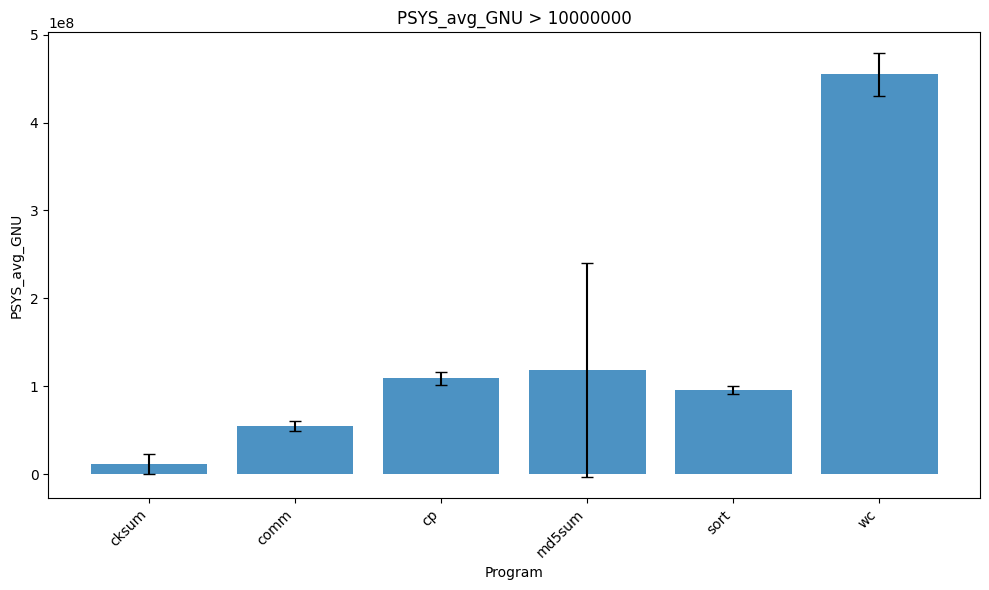

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
bs_file_path = os.path.join(results_dir, 'averagePSYS_with_std_all_repeats_pivot.csv')
data = pd.read_csv(bs_file_path, delimiter=';')

# Separate the programs based on the value of PSYS_avg_GNU
lower_than_1000000 = data[data['PSYS_avg_GNU'] < 1000000]
between_1000000_and_10000000 = data[(data['PSYS_avg_GNU'] >= 1000000) & (data['PSYS_avg_GNU'] <= 10000000)]
higher_than_10000000 = data[data['PSYS_avg_GNU'] > 10000000]

# Function to plot bar chart with error bars
def plot_bar_chart(df, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(df['Program'], df['PSYS_avg_GNU'], yerr=df['PSYS_std_GNU'], capsize=4, alpha=0.8)
    ax.set_xlabel('Program')
    ax.set_ylabel('PSYS_avg_GNU')
    ax.set_title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot the three categories
plot_bar_chart(lower_than_1000000, 'PSYS_avg_GNU < 1000000')
plot_bar_chart(between_1000000_and_10000000, 'PSYS_avg_GNU between 1000000 and 10000000')
plot_bar_chart(higher_than_10000000, 'PSYS_avg_GNU > 10000000')



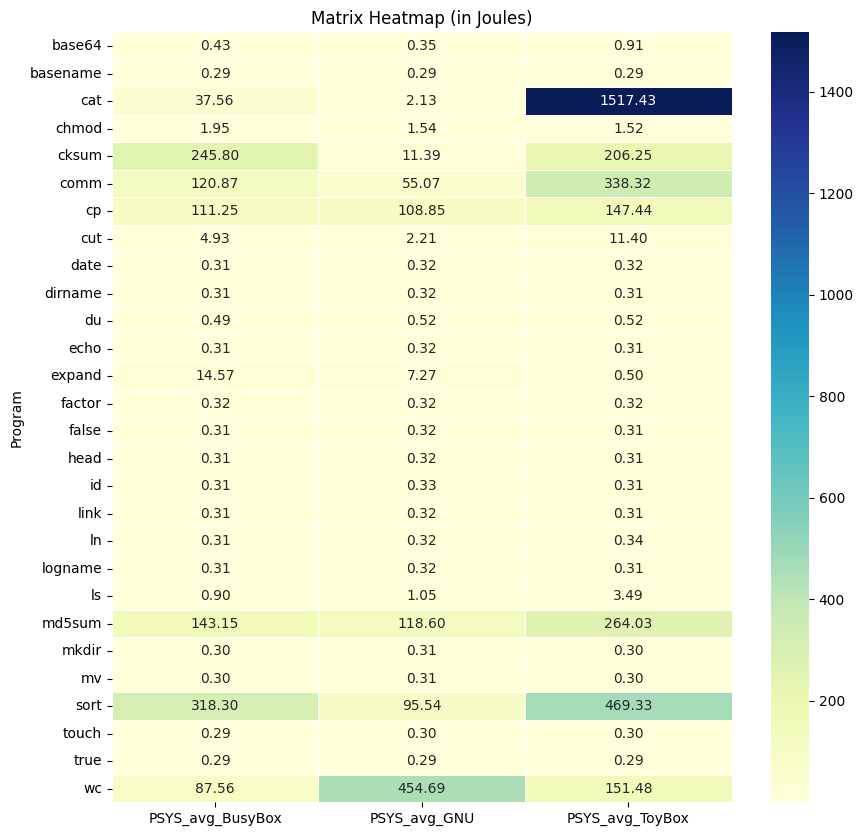

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data as provided (in microjoules)
data = {
    'Program': ['base64', 'basename', 'cat', 'chmod', 'cksum', 'comm', 'cp', 'cut', 'date', 'dirname', 'du', 'echo', 'expand', 'factor', 'false', 'head', 'id', 'link', 'ln', 'logname', 'ls', 'md5sum', 'mkdir', 'mv', 'sort', 'touch', 'true', 'wc'],
    'PSYS_avg_BusyBox': [430354.5, 293712.65, 37555418.35, 1951975.55, 245804674.7, 120871544.2, 111249422.3, 4932394.1, 312215.25, 310088.4, 490593.25, 305297.2, 14566014.9, 316259.0, 305318.35, 307939.85, 308193.3, 306343.65, 305120.05, 310082.15, 898062.85, 143150640.5, 297652.6, 295278.2, 318299264.7, 294509.05, 294853.9, 87557206.75],
    'PSYS_avg_GNU': [349504.85, 294027.1, 2125736.1, 1539668.7, 11393452.35, 55065279.7, 108848402.9, 2207312.35, 315367.9, 321538.4, 523237.7, 321446.9, 7273003.85, 321971.9, 320140.65, 320018.7, 327916.7, 317284.3, 322475.35, 322386.9, 1048413.35, 118599778.8, 306612.3, 306938.95, 95543426.25, 295195.75, 294783.85, 454693406.8],
    'PSYS_avg_ToyBox': [907797.9, 292617.1, 1517433316.2, 1523403.2, 206246026.75, 338316876.9, 147443488.4, 11399989.05, 315306.9, 312242.9, 518535.05, 310884.75, 502357.8, 316164.25, 314748.35, 314821.5, 313204.25, 312355.8, 335704.6, 310829.8, 3487466.7, 264030510.05, 300334.95, 296898.8, 469334195.7, 295180.6, 290862.3, 151481252.75],
}

# Convert the microjoules to joules
for col in data.keys():
    if col != 'Program':
        data[col] = [val / 1000000 for val in data[col]]

# Create a DataFrame
df = pd.DataFrame(data)

# Set the 'Program' column as the index
df.set_index('Program', inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Matrix Heatmap (in Joules)")
plt.show()


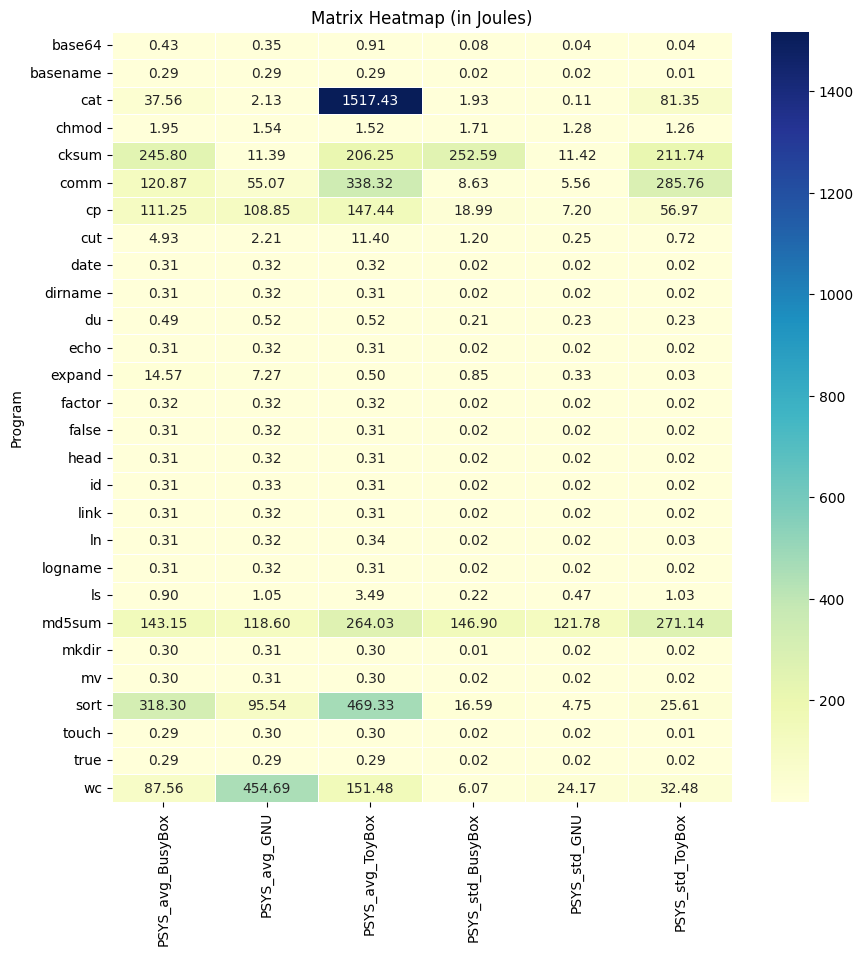

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data as provided (in microjoules)
data = {
    'Program': ['base64', 'basename', 'cat', 'chmod', 'cksum', 'comm', 'cp', 'cut', 'date', 'dirname', 'du', 'echo', 'expand', 'factor', 'false', 'head', 'id', 'link', 'ln', 'logname', 'ls', 'md5sum', 'mkdir', 'mv', 'sort', 'touch', 'true', 'wc'],
    'PSYS_avg_BusyBox': [430354.5, 293712.65, 37555418.35, 1951975.55, 245804674.7, 120871544.2, 111249422.3, 4932394.1, 312215.25, 310088.4, 490593.25, 305297.2, 14566014.9, 316259.0, 305318.35, 307939.85, 308193.3, 306343.65, 305120.05, 310082.15, 898062.85, 143150640.5, 297652.6, 295278.2, 318299264.7, 294509.05, 294853.9, 87557206.75],
    'PSYS_avg_GNU': [349504.85, 294027.1, 2125736.1, 1539668.7, 11393452.35, 55065279.7, 108848402.9, 2207312.35, 315367.9, 321538.4, 523237.7, 321446.9, 7273003.85, 321971.9, 320140.65, 320018.7, 327916.7, 317284.3, 322475.35, 322386.9, 1048413.35, 118599778.8, 306612.3, 306938.95, 95543426.25, 295195.75, 294783.85, 454693406.8],
    'PSYS_avg_ToyBox': [907797.9, 292617.1, 1517433316.2, 1523403.2, 206246026.75, 338316876.9, 147443488.4, 11399989.05, 315306.9, 312242.9, 518535.05, 310884.75, 502357.8, 316164.25, 314748.35, 314821.5, 313204.25, 312355.8, 335704.6, 310829.8, 3487466.7, 264030510.05, 300334.95, 296898.8, 469334195.7, 295180.6, 290862.3, 151481252.75],
    'PSYS_std_BusyBox': [79873.85, 15979.27, 1933901.17, 1710632.31, 252587319.36, 8632370.96, 18988309.85, 1196929.75, 19193.64, 20070.1, 208065.35, 19532.93, 848150.37, 20892.24, 16701.09, 21285.09, 20107.47, 20841.41, 18823.7, 21138.62, 218566.44, 146898427.43, 14539.16, 16224.78, 16594187.59, 16547.22, 15878.53, 6071930.63],
    'PSYS_std_GNU': [39334.43, 16076.31, 106527.49, 1279563.53, 11415710.21, 5564975.29, 7204404.59, 252658.47, 20636.38, 18927.79, 230875.24, 18236.49, 331423.93, 17206.73, 19096.96, 18191.08, 22629.0, 19773.28, 20015.18, 16001.76, 472132.06, 121781334.04, 19590.62, 21166.24, 4749182.22, 18711.36, 21168.29, 24167082.57],
    'PSYS_std_ToyBox': [43460.6, 13297.88, 81347967.94, 1262759.87, 211739514.32, 285759714.09, 56974750.43, 717489.24, 19048.64, 18102.39, 229144.16, 19029.26, 28736.79, 17668.85, 18049.95, 19263.23, 15741.95, 20716.7, 33518.05, 19138.98, 1028529.91, 271143547.34, 17902.22, 16479.84, 25613373.61, 14868.63, 18211.51, 32477547.88],
}

# Convert the microjoules to joules (both average and standard deviation values)
for col in data.keys():
    if col != 'Program':
        data[col] = [val / 1000000 for val in data[col]]

# Create a DataFrame
df = pd.DataFrame(data)

# Set the 'Program' column as the index
df.set_index('Program', inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Matrix Heatmap (in Joules)")
plt.show()


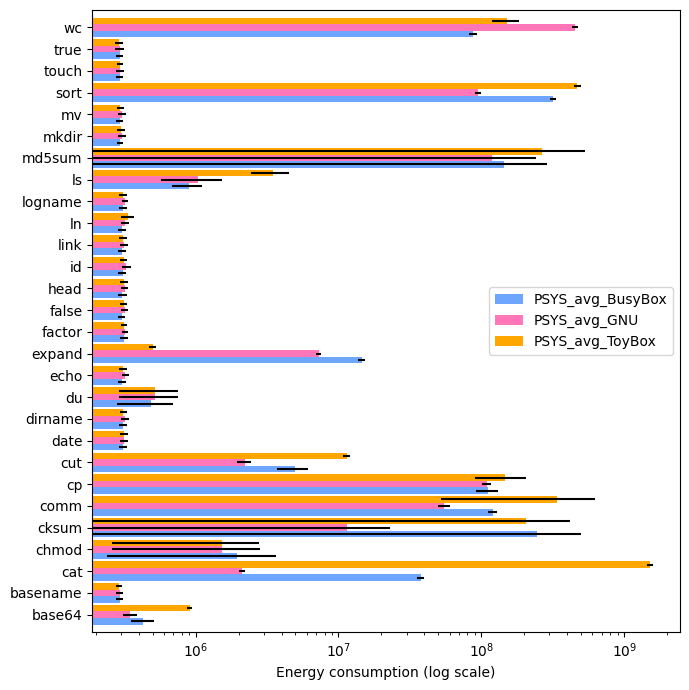

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the CSV file
bs_file_path = os.path.join(results_dir, 'averagePSYS_with_std_all_repeats_pivot.csv')
data = pd.read_csv(bs_file_path, delimiter=';')

# Extract the relevant columns for plotting
programs = data['Program']
PSYS_avg_BusyBox = data['PSYS_avg_BusyBox']
PSYS_avg_GNU = data['PSYS_avg_GNU']
PSYS_avg_ToyBox = data['PSYS_avg_ToyBox']
PSYS_std_BusyBox = data['PSYS_std_BusyBox']
PSYS_std_GNU = data['PSYS_std_GNU']
PSYS_std_ToyBox = data['PSYS_std_ToyBox']


# Define a high-contrast color palette
# high_contrast_colors = ['#9467bd', '#ffbc78', '#17becf']
# high_contrast_colors = ['#1f77b4', '#d62728', '#ffbb78']
# high_contrast_colors = ['#aec7e8', '#98df8a', '#ff9896']
high_contrast_colors = ['#6ea5ff', '#ff8cbb', '#ffc852']

# Plotting
y = np.arange(len(programs))
height = 0.3

fig, ax = plt.subplots(figsize=(7, 7))  # Adjust figure size for horizontal layout
rects1 = ax.barh(y - height, PSYS_avg_BusyBox, height, label='PSYS_avg_BusyBox', xerr=PSYS_std_BusyBox, color=high_contrast_colors[0])
rects2 = ax.barh(y, PSYS_avg_GNU, height, label='PSYS_avg_GNU', xerr=PSYS_std_GNU, color=high_contrast_colors[1])
rects3 = ax.barh(y + height, PSYS_avg_ToyBox, height, label='PSYS_avg_ToyBox', xerr=PSYS_std_ToyBox, color=high_contrast_colors[2])

ax.set_xscale('log')  # Set the x-axis scale to logarithmic
ax.set_xlabel('Energy consumption (log scale)')
#ax.set_ylabel('Program')
#ax.set_title('Average and Standard Deviation of Energy Consumption for Different Implementations')
ax.set_yticks(y)
ax.set_yticklabels(programs)  # Use program names for y-axis ticks
ax.legend()

# Set the y-axis limits with a small offset
offset = 0.5  # Adjust this value to control the amount of spacing
ax.set_ylim(-height - offset, len(programs) - 1 + height + offset)

plt.tight_layout()
plt.show()



